# Tabla de contenidos

* [Instalación del simulador CD++](#instalacionCD++)
* [Simulador CD++](#simuladorCD++)
* [Ejemplos en CD++](#ejemplosCD++)
* [Scripts útiles](#scripts)
* [Hola Mundo!](#holamundo)

# Bibliotecas de Python 

En este notebook vamos a utilizar las siguientes bibliotecas de Python:
* pathlib
* pandas
* scipy
* matplotlib

Para instalarlas podemos correr la siguiente línea (si están usando un *venv* deben correrlo dentro del entorno virtual):

```
$ pip install pathlib pandas matplotlib scipy
```

Dado que el notebook utiliza Python 3 asegurarse de instalar las bibliotecas correspondientes a esta versión, utilizando por ejemplo `pip3`. 

<a id='instalacionCD++'></a>
# Instalación del simulador CD++

## Máquina virtual

Pueden descargar la máquina virtual de la materia con todas las herramientas de simulación que utilizaremos a lo largo del curso ya instaladas:

```
ftp://modsimu.exp.dc.uba.ar/VM2022
```

Todas las herramientas se encuentran en el directorio `/home/seduser/SED/`. Para ejecutarlas vamos a hacerlo desde dentro de un entorno virtual de Python que ya está creado en la VM. A continuación nos paramos en este directorio y entramos en el entorno virtual:

```bash
$ cd SED
$ source .env37/bin/activate 
```

Luego de ejecutar la última línea vamos a notar que el _prompt_ cambia:

```bash
seduser@sed:~/SED$ source .env37/bin/activate
(.env37) seduser@sed:~/SED$
```

Luego, para correr por ejemplo `jupyter-lab` lo hacemos desde adentro de un entorno virtual:

```bash
$ jupyter-lab
```

## Descarga

La forma más senclla de obtener el código fuente del simulador es clonando el repositorio git:

```
 $ git clone https://github.com/SimulationEverywhere/CDPP_ExtendedStates-codename-Santi.git
```

A continuación vamos a descargar el simulador del repositorio [SimulationEverywhere](https://github.com/SimulationEverywhere/CDPP_ExtendedStates-codename-Santi). Para ello vamos a cargar primero la biblioteca `pathlib` de Python.

In [3]:
from pathlib import Path

 Ahora vamos a definir algunas variables de entorno de Bash que utilizaremos a lo largo de este notebook:

In [4]:
# Pide al usuario que introduzca la ruta
user_input = input("Por favor, introduce la ruta donde quieres crear/ubicar la carpeta SED: ") #Ejemplo /home/juancito/desktop

# Si el usuario simplemente presiona Enter (es decir, no introduce nada), usa el directorio home como valor predeterminado.
if not user_input:
    SED_HOME = Path.home().joinpath('SED')
else:
    SED_HOME = Path(user_input).joinpath('SED')

print(f"SED_HOME se ha establecido en: {SED_HOME}")

# URL del repositorio de cd++
CDPP_REPO = 'https://github.com/SimulationEverywhere/CDPP_ExtendedStates-codename-Santi.git'

Por favor, introduce la ruta donde quieres crear/ubicar la carpeta SED:  /home/cami/Desktop


SED_HOME se ha establecido en: /home/cami/Desktop/SED


Finalmente clonamos el repositorio `CDPP_REPO` en la carpeta `SED_HOME`:

In [5]:
%%bash -s "$SED_HOME" "$CDPP_REPO"

# $1 es el directorio donde vamos a clonar el cd++ (CDPP_DIR)
# $2 la URL del repo (CDPP_REPO)

# si el directorio existe, no hago nada, caso contrario, creo la carpeta
[ -d $1 ] || mkdir -p $1
cd $1

# si el directorio existe, no hago nada, caso contrario, traigo el simu con git clone
[ -d CDPP_ExtendedStates-codename-Santi ] || git clone $2 

echo "Finalizado!"

Finalizado!


Creamos una nueva variable de entorno con la ruta completa al directorio donde descargamos el repositorio y donde vamos a quedar instalado el simulador:

In [6]:
# Directorio base donde está instalado el simulador
CDPP_DIR = SED_HOME.joinpath('CDPP_ExtendedStates-codename-Santi') # CDPP_DIR = SED_HOME+'CDPP_ExtendedStates-codename-Santi'




## Prerequisitos para instalar CD++

Para instalar el simulador necesitamos tener instaladas ls siguientes bibliotecas:

 * `GCC 4.7` or higher (with C++11 support)
 * `bison`
 * `GNU make`
 
 La forma más sencilla es utilizando apt:
 
```bash
$ sudo apt install build-essential bison
```

## Compilación del simulador CD++

Para compilar el _kernel_ del simulador, vamos al directorio en donde está ubicado el código fuente y corremos el comando `make`:

```bash
 $ cd $CDPP_DIR/CDPP_ExtendedStates-codename-Santi/src
 $ make
```

Para esto primero creamos la variable de entorno `CDPP_SRC` con la ruta a código fuente del simulador:

In [7]:
CDPP_SRC = CDPP_DIR.joinpath('src')


A continuación compilamos el código fuente del simulador:

In [8]:
%%bash -s "$CDPP_SRC"

cd $1

ls

# limpiamos compilaciones viejas si las hay. Si devuelve error probar comentando make clean
make clean

# compilamos cd++ (esto demora unos minutos y no se ve ninguna salida... sólo mensajes de g++ y warnings al final)
make -j4

bin
cd++
Makefile
tools
make -C cd++ clean OBJ_DIR=obj
make[1]: Entering directory '/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++'
make -C /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics clean OBJ_DIR=obj SRC_DIR=/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++
make[2]: Entering directory '/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics'
make -C cpu clean OBJ_DIR=obj SRC_DIR=/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++	
make[3]: Entering directory '/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu'
make[3]: Leaving directory '/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu'
make -C queue clean OBJ_DIR=obj SRC_DIR=/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++	
make[3]: Entering directory '/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue'
make[3]: Leaving director

In file included from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/val/tbool.h:21,
                 from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/val/real.h:22,
                 from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/utils/strutil.h:28,
                 from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/model/pmodeladm.h:29,
                 from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/model/port.h:25,
                 from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/model/model.h:26,
                 from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/model/atomic.h:24,
                 from qss1.h:6,
                 from qss1.cpp:8:
/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/val/tuple_value.h: In instantiation of ‘const T& Tuple<T>::operator[](int) const [with T = Real]’:
qss1.cpp:57:52:   

make[3]: Leaving directory '/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu'
make[3]: Leaving directory '/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue'
make -C generator OBJ_DIR=obj SRC_DIR=/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++
make -C transducer OBJ_DIR=obj SRC_DIR=/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++
make[3]: Entering directory '/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator'
make[3]: Entering directory '/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer'
g++ -c -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator 

In file included from generat.cpp:18:
generat.h: In constructor ‘Generator::Generator(const string&)’:
generat.h:79:14: warning: ‘Generator::stop’ will be initialized after [-Wreorder]
   79 |  const Port &stop;
      |              ^~~~
generat.h:78:8: warning:   ‘Port& Generator::out’ [-Wreorder]
   78 |  Port &out ;
      |        ^~~
generat.cpp:62:1: warning:   when initialized here [-Wreorder]
   62 | Generator::Generator( const string &name )
      | ^~~~~~~~~


make[3]: Leaving directory '/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator'
g++ -c -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped/notime -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped/common -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/evt -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd+

In file included from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/val/tbool.h:21,
                 from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/val/real.h:22,
                 from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/utils/strutil.h:28,
                 from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/model/pmodeladm.h:29,
                 from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/model/port.h:25,
                 from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/model/model.h:26,
                 from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/model/atomic.h:24,
                 from qss2.h:6,
                 from qss2.cpp:8:
/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/val/tuple_value.h: In instantiation of ‘const T& Tuple<T>::operator[](int) const [with T = Real]’:
qss2.cpp:60:23:   

make[3]: Leaving directory '/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer'
g++ -c -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped/notime -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped/common -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/evt -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd

In file included from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/val/tbool.h:21,
                 from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/val/real.h:22,
                 from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/utils/strutil.h:28,
                 from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/model/pmodeladm.h:29,
                 from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/model/port.h:25,
                 from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/model/model.h:26,
                 from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/model/atomic.h:24,
                 from qss3.h:6,
                 from qss3.cpp:8:
/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/val/tuple_value.h: In instantiation of ‘const T& Tuple<T>::operator[](int) const [with T = Real]’:
qss3.cpp:62:23:   

g++ -c -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped/notime -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped/common -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/evt -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/misc -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/misc/math -I/home/cami/Desktop/SED/CDP

idcell.cpp: In member function ‘virtual Model& InertialDelayCell::externalFunction(const MessageBag&)’:
idcell.cpp:148:60: warning: suggest parentheses around ‘&&’ within ‘||’ [-Wparentheses]
  148 |   if( (UseQuantum().Active() || UseDynQuantum().Active())  &&
      |       ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^~
  149 |     (*valueWithQuantum(*rc, QuantumValue()) != *valueWithQuantum(*rf, QuantumValue()) )
      |     ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


g++ -c -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped/notime -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped/common -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/evt -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/misc -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/misc/math -I/home/cami/Desktop/SED/CDP

In file included from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/val/tbool.h:21,
                 from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/val/real.h:22,
                 from realfunc.h:18,
                 from realfunc.cpp:15:
/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/val/tuple_value.h: In instantiation of ‘const T& Tuple<T>::operator[](int) const [with T = Real]’:
realfunc.cpp:185:20:   required from here
/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/val/tuple_value.h:59:30: warning: comparison of integer expressions of different signedness: ‘int’ and ‘std::vector<Real, std::allocator<Real> >::size_type’ {aka ‘long unsigned int’} [-Wsign-compare]
   59 |  MASSERT(index >= 0 && index < this->values.size());
/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/misc/except.h:32:30: note: in definition of macro ‘MASSERT’
   32 | #define MASSERT(lexp) if( !( lexp ) ) { Asse

g++ -c -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Sa

com.c: In function ‘advnst’:
com.c:37:5: warning: implicit declaration of function ‘exit’ [-Wimplicit-function-declaration]
   37 |     exit(1);
      |     ^~~~
com.c:3:1: note: include ‘<stdlib.h>’ or provide a declaration of ‘exit’
    2 | #include <stdio.h>
  +++ |+#include <stdlib.h>
    3 | 
com.c:37:5: warning: incompatible implicit declaration of built-in function ‘exit’ [-Wbuiltin-declaration-mismatch]
   37 |     exit(1);
      |     ^~~~
com.c:37:5: note: include ‘<stdlib.h>’ or provide a declaration of ‘exit’
com.c: In function ‘getsd’:
com.c:82:5: warning: incompatible implicit declaration of built-in function ‘exit’ [-Wbuiltin-declaration-mismatch]
   82 |     exit(0);
      |     ^~~~
com.c:82:5: note: include ‘<stdlib.h>’ or provide a declaration of ‘exit’
com.c: In function ‘initgn’:
com.c:177:5: warning: incompatible implicit declaration of built-in function ‘exit’ [-Wbuiltin-declaration-mismatch]
  177 |     exit(1);
      |     ^~~~
com.c:177:5: note: include ‘<stdl

gcc -c -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Sa

tdcell.cpp: In member function ‘virtual Model& TransportDelayCell::externalFunction(const MessageBag&)’:
tdcell.cpp:198:60: warning: suggest parentheses around ‘&&’ within ‘||’ [-Wparentheses]
  198 |   if( (UseQuantum().Active() || UseDynQuantum().Active())  &&
      |       ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^~
  199 |     ( *valueWithQuantum(*rc, QuantumValue()) != *valueWithQuantum(ltb, QuantumValue()) )
      |     ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
tdcell.cpp:206:4: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
  206 |    for ( cursorAux = queueVal().begin(); cursorAux != queueVal().end() && cursorAux->first <= valueTime; cursorAux++ );
      |    ^~~
tdcell.cpp:208:5: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘for’
  208 |     TDCellState::QueueValue qv(calculateOutPort(pvCursor->first), pvCursor->second);
      |     ^~~~~~~~~~~


g++ -c -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Sa

pmodeladm.cpp: In member function ‘virtual FlatCoupledCell& ParallelModelAdmin::newFlatCoupledCell(const string&)’:
pmodeladm.cpp:232:18: warning: ‘coupled’ is used uninitialized in this function [-Wuninitialized]
  232 |  add2DB( coupled );
      |                  ^


g++ -c -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Sa

In file included from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/val/tbool.h:21,
                 from synnode.h:47,
                 from synnode.cpp:21:
/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/val/tuple_value.h: In instantiation of ‘const T& Tuple<T>::operator[](int) const [with T = Real]’:
synnode.cpp:413:23:   required from here
/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/val/tuple_value.h:59:30: warning: comparison of integer expressions of different signedness: ‘int’ and ‘std::vector<Real, std::allocator<Real> >::size_type’ {aka ‘long unsigned int’} [-Wsign-compare]
   59 |  MASSERT(index >= 0 && index < this->values.size());
/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/misc/except.h:32:30: note: in definition of macro ‘MASSERT’
   32 | #define MASSERT(lexp) if( !( lexp ) ) { AssertException e( "Invalid assertion" ) ; e.addText( #lexp ) ; e.addLocation( MEXCEPTION_LOCATION() ) ; throw 

g++ -c -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Sa

real.cpp: In constructor ‘Real::Real(Value)’:
real.cpp:191:3: warning: case label value is less than minimum value for type
  191 |   case -1: rvalue = M_MINFINITO;
      |   ^~~~
real.cpp:187:9: warning: switch condition has boolean value [-Wswitch-bool]
  187 |  switch (isInfinite(Valor)) {
      |         ^


g++ -c -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Sa

In file included from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/val/tbool.h:21,
                 from synnode.h:47,
                 from tuple_node.h:6,
                 from tuple_node.cpp:4:
/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/val/tuple_value.h: In instantiation of ‘const T& Tuple<T>::operator[](int) const [with T = SyntaxNode*]’:
tuple_node.cpp:38:35:   required from here
/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/val/tuple_value.h:59:30: warning: comparison of integer expressions of different signedness: ‘int’ and ‘std::vector<SyntaxNode*>::size_type’ {aka ‘long unsigned int’} [-Wsign-compare]
   59 |  MASSERT(index >= 0 && index < this->values.size());
/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/misc/except.h:32:30: note: in definition of macro ‘MASSERT’
   32 | #define MASSERT(lexp) if( !( lexp ) ) { AssertException e( "Invalid assertion" ) ; e.addText( #lexp ) ; e.addLocation(

make[3]: Leaving directory '/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/utils/log'
g++ -c -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue -I/home/cami/Desktop/SED/CDPP_Extende

In file included from tbool.h:21,
                 from real.h:22,
                 from value.cpp:4:
tuple_value.h: In instantiation of ‘const T& Tuple<T>::operator[](int) const [with T = Real]’:
tuple_value.h:117:13:   required from ‘bool Tuple<T>::equals(const AbstractValue&) const [with T = Real]’
tuple_value.h:107:6:   required from here
tuple_value.h:59:30: warning: comparison of integer expressions of different signedness: ‘int’ and ‘std::vector<Real, std::allocator<Real> >::size_type’ {aka ‘long unsigned int’} [-Wsign-compare]
   59 |  MASSERT(index >= 0 && index < this->values.size());
/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/misc/except.h:32:30: note: in definition of macro ‘MASSERT’
   32 | #define MASSERT(lexp) if( !( lexp ) ) { AssertException e( "Invalid assertion" ) ; e.addText( #lexp ) ; e.addLocation( MEXCEPTION_LOCATION() ) ; throw e ; }
      |                              ^~~~


make[3]: Leaving directory '/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/parser/cdlang'
g++ -c -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue -I/home/cami/Desktop/SED/CDPP_Ext

macroexp.cpp: In member function ‘int macroExpansion::isInclude(char*)’:
macroexp.cpp:24:24: warning: ISO C++ forbids converting a string constant to ‘char*’ [-Wwrite-strings]
   24 | #define MACRO_INCLUDE  "#INCLUDE"
      |                        ^~~~~~~~~~
macroexp.cpp:285:32: note: in expansion of macro ‘MACRO_INCLUDE’
  285 |  return isStringSimilar( line, MACRO_INCLUDE );
      |                                ^~~~~~~~~~~~~
macroexp.cpp: In member function ‘int macroExpansion::isInclude(char*, long int)’:
macroexp.cpp:24:24: warning: ISO C++ forbids converting a string constant to ‘char*’ [-Wwrite-strings]
   24 | #define MACRO_INCLUDE  "#INCLUDE"
      |                        ^~~~~~~~~~
macroexp.cpp:290:41: note: in expansion of macro ‘MACRO_INCLUDE’
  290 |  return isStringSimilar( line, posLine, MACRO_INCLUDE );
      |                                         ^~~~~~~~~~~~~
macroexp.cpp: In member function ‘int macroExpansion::isMacro(char*, long int)’:
macroexp.cpp:25:22: war

g++ -c -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Sa

pprocadm.cpp: In member function ‘ParallelProcessor& ParallelProcessorAdmin::generateProcessor(FlatCoupledCell*, ProcId)’:
pprocadm.cpp:108:49: warning: ‘coord’ is used uninitialized in this function [-Wuninitialized]
  108 |  coupled->processor( (ParallelProcessor*) coord );
      |                                                 ^


make[2]: Leaving directory '/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/main'
make -C /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped OBJ_DIR=obj SRC_DIR=/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++ MODEL_FLAGS=
make[2]: Entering directory '/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped'
make -C common OBJ_DIR=obj SRC_DIR=/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++
make[3]: Entering directory '/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped/common'
g++ -c -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/sr

VTime.cpp: In function ‘std::istream& operator>>(std::istream&, VTime&)’:
VTime.cpp:313:1: warning: no return statement in function returning non-void [-Wreturn-type]
  313 | }
      | ^


g++ -c -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Sa

BasicEvent.cpp: In constructor ‘BasicEvent::BasicEvent(const BasicEvent*)’:
BasicEvent.cpp:58:38: warning: ‘void* memcpy(void*, const void*, size_t)’ writing to an object of type ‘class BasicEvent’ with no trivial copy-assignment; use copy-assignment or copy-initialization instead [-Wclass-memaccess]
   58 |   memcpy(this, be, sizeof(BasicEvent));
      |                                      ^
In file included from BasicEvent.cpp:30:
BasicEvent.h:34:7: note: ‘class BasicEvent’ declared here
   34 | class BasicEvent {
      |       ^~~~~~~~~~


g++ -c -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Sa

CommManager.cpp: In member function ‘virtual void CommManager::recvEvent(BasicEvent*)’:
CommManager.cpp:152:50: warning: ‘void* memcpy(void*, const void*, size_t)’ writing to an object of type ‘class BasicEvent’ with no trivial copy-assignment; use copy-assignment or copy-initialization instead [-Wclass-memaccess]
  152 |  memcpy((BasicEvent *) mpiMsg, event, event->size);
      |                                                  ^
In file included from KernelMsgs.h:31,
                 from CommManager.h:32,
                 from CommManager.cpp:31:
BasicEvent.h:34:7: note: ‘class BasicEvent’ declared here
   34 | class BasicEvent {
      |       ^~~~~~~~~~
CommManager.cpp: In member function ‘void CommManager::routeMsg(BasicMsg*)’:
CommManager.cpp:304:62: warning: ‘void* memcpy(void*, const void*, size_t)’ writing to an object of type ‘class BasicEvent’ with no trivial copy-assignment; use copy-assignment or copy-initialization instead [-Wclass-memaccess]
  304 |     memcpy(toDeliver,

make[2]: Leaving directory '/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/proc'
g++ -c -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue -I/home/cami/Desktop/SED/CDPP_ExtendedStat

DebugStream.cpp: In member function ‘virtual void DebugStream::interact()’:
DebugStream.cpp:682:31: warning: ‘char* gets(char*)’ is deprecated [-Wdeprecated-declarations]
  682 |     char *result = gets(buffer);
      |                               ^
In file included from /usr/include/c++/9/cstdio:42,
                 from /usr/include/c++/9/ext/string_conversions.h:43,
                 from /usr/include/c++/9/bits/basic_string.h:6501,
                 from /usr/include/c++/9/string:55,
                 from /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped/common/VTime.h:20,
                 from DefaultVTime.h:35,
                 from SimulationTime.h:30,
                 from BasicEvent.h:31,
                 from LogicalProcess.h:30,
                 from DebugStream.cpp:31:
/usr/include/stdio.h:605:14: note: declared here
  605 | extern char *gets (char *__s) __wur __attribute_deprecated__;
      |              ^~~~
DebugStream.cpp:682:31: warning: ‘char*

g++ -c -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/transducer/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/generator/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/qss/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue/obj -I/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Sa

/usr/bin/ld: /home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/bin/libsimu.a(macroexp.o): in function `macroExpansion::expand[abi:cxx11]()':
/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/utils/macroexp.cpp:147: warning: the use of `tmpnam' is dangerous, better use `mkstemp'
/usr/bin/ld: warped/notime/obj/DebugStream.o: in function `DebugStream::interact()':
/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped/notime/DebugStream.cpp:682: warning: the `gets' function is dangerous and should not be used.


make[1]: Leaving directory '/home/cami/Desktop/SED/CDPP_ExtendedStates-codename-Santi/src/cd++'


Una vez que termina la compilación se crea el subdirectorio `bin` dentro de `CDPP_SRC` y este contendrá el archivo ejecutable `cd++`:

In [40]:
%%bash -s "$CDPP_SRC"

#!ls {CDPP_SRC}



cd $1/bin

ls

cd++
libsimu.a


<a id='simuladorCD++'></a>
# Simulador CD++

Una vez instalado vamos a interactuar con el simulador por línea de comandos. Para consultar la ayuda del simulador vamos a invocarlo con la opción `-h`.

Notar que al inicio de la celda que sigue vamos a utilizar el comando _magic_ `%%bash -s "$CDPP_SRC"` para crear en Bash la variable de entorno `CDPP_SRC` que definimos previamente en Python. Esta variable incluye la ruta donde se encuentra el archivo ejecutable del simulador. 

In [41]:
%%bash -s "$CDPP_SRC"

cd $1

bin/cd++ -h

bin/cd++ [-ehlmotdpvbfrsqw]
	e: events file (default: none)
	h: show this help
	l: logs all messages to a log file (default: /dev/null)
	L[I*@XYDS]: log modifiers (logs only the specified messages) 
	m: model file (default : model.ma)
	o: output (default: /dev/null)
	t: stop time (default: Infinity)
	d: set tolerance used to compare real numbers
	p: print extra info when the parsing occurs (only for cells models)
	D: partition details file (default: /dev/null)
	P: parallel partition file (will run parallel simulation)
	v: evaluate debug mode (only for cells models)
	b: bypass the preprocessor (macros are ignored)
	f: flat debug mode (only for flat cells models)
	r: debug cell rules mode (only for cells models)
	s: show the virtual time when the simulation ends (on stderr)
	q: use quantum to compute cell values
	y: use dynamic quantum (strategy 1) to compute cells values
	Y: use dynamic quantum (strategy 2) to compute cells values
	w: sets the width and precision (with form xx-yy) to sh

En los ejemplos que siguen vamos a utilizar los parámetros:

* `-m` para pasarle el modelo a simular
* `-t` tiempo final de la simulación. Formato **HH:MM:SS:MS**:
  * HH: cantidad de horas
  * MM: minutos (0 a 59)
  * SS: segundos (0 a 59)
  * MS: milisegundos (0 a 999)
* `-e` para pasarle un archivo con eventos de la o las entradas del modelo
* `-l` para indicarle dónde queremos almacenar los mensajes intercambiados internamente por los modelos atómicos y acoplados
* `-o` para indicarle dónde queremos almacenar la información de la o las salidas del modelo
    

<a id='ejemplosCD++'></a>

# Ejemplos en CD++

Junto con el simulador vamos a descargar también algunos ejemplos en la carpeta `examples/` dentro de la ruta `CDPP_DIR`.

A continuación vamos a crear una variable de entorno con la ruta a esta carpeta:

In [42]:
CDPP_EXAMPLES = CDPP_DIR.joinpath('examples')

# podemos ver el contenido de la variable de entorno
# print(CDPP_EXAMPLES)

Para ver los ejemplos disponibles ejecutamos lo siguiente:

In [43]:
%%bash -s "$CDPP_EXAMPLES"

cd $1

ls

const_generator
generator
pulse
qss
template


* **Generador de eventos periódicos** `const_generator`: Generador que produce eventos periódicos con una entrada de _stop_ y una salida. La frecuencia de los eventos se define por medio de un parámetro _frequency_.
* **Generador de eventos aleatorios** `generator`: Generador que produce eventos cada un tiempo aleatorio y cuya salida toma valores que se incrementan con cada evento a partir de un valor inicial. Tiene una única entrada de _stop_ y parámetros: _distribution_, _initial_, _increment_ correspondientes a la distribución de los eventos, el valor inicial de la salida y el incremento del valor del evento de salida respectivamente.
* **Pulsos** `pulse`: Generador de eventos periódicos de eventos con dos entradas: _start_ y _stop_ y una salida. Los eventos de salida toman un valor aleatorio distribuido de forma uniforme entre $0$ y $1$.
* **QSS** `qss`: Se trata de dos integradores conectados de forma circular que evolucionan a partir de condiciones iniciales:
\begin{align*}
    \dot{x}(t) &= y(t)\\
    \dot{y}(t) &= -x(t)
\end{align*}

<a id='scripts'></a>

# Scripts útiles

En la carpeta `scripts/` pueden encontrar el script `tuple_to_real.py` que utilzaremos para convertir un archivo con tuplas de valores en un achivo de reales:

In [44]:
%%bash -s "$CDPP_DIR"

cd $1/scripts

ls

tuple_to_real.py


<a id='holamundo'></a>

# Ejemplo _Hola Mundo!_

Tomemos el ejemplo **Pulse** en `examples/pulse/`. Vamos a ejecutar esta simulación para verificar que el simulador se instaló correctamente.

## Descripción del modelo (modelo conceptual)

* Este modelo atómico genera internamente eventos a intervalos regulares
* Tiene dos entradas: _start_, _stop_
* Tiene una única salida: _out_
* El valor de los eventos de salida es una tupla de 3 elementos: $[x, 0, 1]$, donde $x$ son realizaciones de una variable aleatoria con distribución uniforme entre $0$ y $100$

<center></center>

## Simulador y modelo por separado

### Modelo: modelo acoplado y componentes

Veamos el contenido del archivo `pulse.ma` en el cual se describe la estructura del modelo que se encuentra dentro de `CDPP_EXAMPLES` en  la carpeta `pulse/model/`:

In [45]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/pulse/model/

cat pulse.ma

[top]
components : pulse@pulse
out : out_port
in : start stop
link : start start@pulse
link : stop stop@pulse
link : out@pulse out_port


El comportamiento del modelo está definido en el archivo `pulse.cpp` que se encuentra dentro de `CDPP_EXAMPLES` en  la carpeta `pulse/src/`:

In [54]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/pulse/src/

ls

bin
Makefile
pulse.cpp
pulse.dep
pulse.h
reg.cpp
reg.dep


### Simulador CD++



Por medio del comando `make` compilamos el modelo:

In [55]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/pulse/src/

make -j4

make -C ../../../src/cd++ cd++ OUT_DIR=/home/cami/desktop/SED/SED/CDPP_ExtendedStates-codename-Santi/examples/pulse/src/bin MODEL_FLAGS=-DREGISTER_ATOMICS
make[1]: Entering directory '/home/cami/desktop/SED/SED/CDPP_ExtendedStates-codename-Santi/src/cd++'
make -C /home/cami/desktop/SED/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics OBJ_DIR=obj SRC_DIR=/home/cami/desktop/SED/SED/CDPP_ExtendedStates-codename-Santi/src/cd++ MODEL_FLAGS=-DREGISTER_ATOMICS
make -C /home/cami/desktop/SED/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/cell OBJ_DIR=obj SRC_DIR=/home/cami/desktop/SED/SED/CDPP_ExtendedStates-codename-Santi/src/cd++ MODEL_FLAGS=-DREGISTER_ATOMICS
make[2]: Entering directory '/home/cami/desktop/SED/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics'
make -C cpu OBJ_DIR=obj SRC_DIR=/home/cami/desktop/SED/SED/CDPP_ExtendedStates-codename-Santi/src/cd++
make -C queue OBJ_DIR=obj SRC_DIR=/home/cami/desktop/SED/SED/CDPP_ExtendedStates-codename-Santi/src/cd++
make -C qss 

/usr/bin/ld: /home/cami/desktop/SED/SED/CDPP_ExtendedStates-codename-Santi/examples/pulse/src/bin/libsimu.a(macroexp.o): in function `macroExpansion::expand[abi:cxx11]()':
/home/cami/desktop/SED/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/utils/macroexp.cpp:147: warning: the use of `tmpnam' is dangerous, better use `mkstemp'
/usr/bin/ld: warped/notime/obj/DebugStream.o: in function `DebugStream::interact()':
/home/cami/desktop/SED/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped/notime/DebugStream.cpp:682: warning: the `gets' function is dangerous and should not be used.


make[1]: Leaving directory '/home/cami/desktop/SED/SED/CDPP_ExtendedStates-codename-Santi/src/cd++'


Si todo fue bien, ahora tenemos un directorio `bin` dentro de `examples/pulse/src/` que es una versión del simulador que incluye el modelo atómico `pulse`:

In [56]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/pulse/src/

# para ver dónde estamos paradxs
pwd

ls bin

/home/cami/desktop/SED/SED/CDPP_ExtendedStates-codename-Santi/examples/pulse/src
cd++
libsimu.a
pulse.o
reg.o


## Simulación del modelo en CD++

El archivo de eventos de entrada `pulse.ev` contiene los eventos externos enviados a los puertos de entrada del modelo acoplado de jerarquía superior (_top model_).

Los eventos tienen una etiqueta de tiempo con formato VTime: HH:MM:SS:MS.

Podemos ver varios eventos externos enviados al puerto de entrada _start_ entre los instantes 00:00:00:15 y 00:02:08:45.

Podemos ver el evento de terminación enviado al puerto de entrada _stop_ del modelo en el instante 00:05:00:00.

In [57]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/pulse/model/

head pulse.ev

00:00:00:15 start 1
00:00:00:30 start 1
00:00:00:45 start 1
00:00:01:20 start 1
00:00:01:40 start 1
00:00:03:10 start 1
00:00:04:45 start 1
00:02:08:45 start 1
00:05:00:00 stop 1


Ahora podemos ejecutar la simulación usando la descripción en el subdirectorio `model`:

In [58]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/pulse/src/

bin/cd++ -m ../model/pulse.ma  \
         -e ../model/pulse.ev  \
         -l ../pulse.log \
         -o ../pulse.out

PCD++: A Tool to Implement n-Dimensional Cell-DEVS models
Version 3.0 - March 2003
Troccoli A., Rodriguez D., Wainer G., Barylko A., Beyoglonian J., Lopez A.
-----------------------------------------------------------------------------
PCD++ Extended States: An extended and improved version of CD++ for Cell-DEVS
Version 4.1.2 - December 2018
Santi L., Castro, R., Pimás, J.
-----------------------------------------------------------------------------
Discrete Event Simulation Lab
Departamento de Computación
Facultad de Ciencias Exactas y Naturales
Universidad de Buenos Aires, Argentina
-----------------------------------------------------------------------------
Compiled for standalone simulation


Loading models from ../model/pulse.ma
Loading events from ../model/pulse.ev
Running parallel simulation. Reading models partition from 
Model partition details output to: /dev/null*
Message log: ../pulse.log
Output to: ../pulse.out
Tolerance set to: 1e-08
Configuration to show real numbers: W

Podemos notar que no estamos usando la opción `-t` porque la simulación termina por el evento de entrada en el puerto _stop_.

## Análisis de los resultados

Veamos los eventos generados en la salida del atómico en el archivo _out_. El formato de cada línea es `<etiqueta_de_tiempo, puerto, valor>`. Recordemos que los valores de los eventos de salida son tuplas de 3 elementos:

In [59]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/pulse/

head pulse.out

00:00:02:040:0 out_port [68, 0, 1]
00:00:04:010:0 out_port [54, 0, 1]
00:00:05:045:0 out_port [27, 0, 1]
00:00:06:045:0 out_port [15, 0, 1]
00:00:07:045:0 out_port [70, 0, 1]
00:00:08:045:0 out_port [29, 0, 1]
00:00:09:045:0 out_port [68, 0, 1]
00:00:10:045:0 out_port [65, 0, 1]
00:00:11:045:0 out_port [33, 0, 1]
00:00:12:045:0 out_port [20, 0, 1]


Además del archivo de eventos de salida se generan varios archivos de _log_ de mensajes internos. Veamos el contenido de `pulse.log`:

In [60]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/pulse/

cat pulse.log

[logfiles]
ParallelRoot : ../pulse.log00 
top : ../pulse.log02 
pulse : ../pulse.log01 


Este archivo describe el contenido de los restantes archivos de _log_. Veamos por el contenido de `pulse.log00`:

In [61]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/pulse/

head pulse.log00

0 / L / D / 00:00:00:000:0 / top(02) / 00:00:01:000:0 / ParallelRoot(00)
0 / L / D / 00:00:00:015:0 / top(02) / 00:00:01:000:0 / ParallelRoot(00)
0 / L / D / 00:00:00:030:0 / top(02) / 00:00:01:000:0 / ParallelRoot(00)
0 / L / D / 00:00:00:045:0 / top(02) / 00:00:01:000:0 / ParallelRoot(00)
0 / L / D / 00:00:01:020:0 / top(02) / 00:00:01:000:0 / ParallelRoot(00)
0 / L / D / 00:00:01:040:0 / top(02) / 00:00:01:000:0 / ParallelRoot(00)
0 / L / Y / 00:00:02:040:0 / top(02) / out_port / [68, 0, 1] / ParallelRoot(00)
0 / L / D / 00:00:02:040:0 / top(02) / 00:00:00:000:0 / ParallelRoot(00)
0 / L / D / 00:00:02:040:0 / top(02) / 00:00:01:000:0 / ParallelRoot(00)
0 / L / D / 00:00:03:010:0 / top(02) / 00:00:01:000:0 / ParallelRoot(00)


Ahora veamos por el contenido de `pulse.log01`:

In [62]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/pulse/

head pulse.log01

0 / L / I / 00:00:00:000:0 / top(02) / pulse(01)
0 / L / X / 00:00:00:015:0 / top(02) / start /      1.00000 / pulse(01)
0 / L / * / 00:00:00:015:0 / top(02) / pulse(01)
0 / L / X / 00:00:00:030:0 / top(02) / start /      1.00000 / pulse(01)
0 / L / * / 00:00:00:030:0 / top(02) / pulse(01)
0 / L / X / 00:00:00:045:0 / top(02) / start /      1.00000 / pulse(01)
0 / L / * / 00:00:00:045:0 / top(02) / pulse(01)
0 / L / X / 00:00:01:020:0 / top(02) / start /      1.00000 / pulse(01)
0 / L / * / 00:00:01:020:0 / top(02) / pulse(01)
0 / L / X / 00:00:01:040:0 / top(02) / start /      1.00000 / pulse(01)


Finalmente, veamos por el contenido de `pulse.log02`:

In [63]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/pulse/

head pulse.log02

0 / L / I / 00:00:00:000:0 / ParallelRoot(00) / top(02)
0 / L / D / 00:00:00:000:0 / pulse(01) / 00:00:01:000:0 / top(02)
0 / L / X / 00:00:00:015:0 / ParallelRoot(00) / start /      1.00000 / top(02)
0 / L / * / 00:00:00:015:0 / ParallelRoot(00) / top(02)
0 / L / D / 00:00:00:015:0 / pulse(01) / 00:00:01:000:0 / top(02)
0 / L / X / 00:00:00:030:0 / ParallelRoot(00) / start /      1.00000 / top(02)
0 / L / * / 00:00:00:030:0 / ParallelRoot(00) / top(02)
0 / L / D / 00:00:00:030:0 / pulse(01) / 00:00:01:000:0 / top(02)
0 / L / X / 00:00:00:045:0 / ParallelRoot(00) / start /      1.00000 / top(02)
0 / L / * / 00:00:00:045:0 / ParallelRoot(00) / top(02)


A continuación vamos a graficar la primera componente de la tupla de los eventos de salida en el archivo `pulse.out`:

In [64]:
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

Definamos algunas variables de entornos adicionales para este ejempo:

In [65]:
# definimos los path a los archivos de interés
LOG_FILENAME = str(CDPP_EXAMPLES)+"/pulse/pulse.log"
OUT_FILENAME = str(CDPP_EXAMPLES)+"/pulse/pulse.out"

# con el script tuple_to_real elegimos el índice 0 de la 3-upla
# tuple_to_real.tuple_to_real(OUT_FILENAME, 0)

# definimos los nombres de las columnas en los dataframes de pandas
TIME_COL_ORIG = 'time_orig'
TIME_COL = 'time'
PORT_COL = 'port'
VALUE_COL_ORIG = 'value_orig'
VALUE_COL = 'value'
MESSAGE_TYPE_COL = 'message_type'
MODEL_ORIGIN_COL = 'model_origin'
MODEL_DEST_COL = 'model_dest'

Definimos algunas funciones para _parsear_ los eventos del archivo de salida y cargarlos en un dataframe de `pandas`:

In [66]:
# parsea cada fila del dataframe
def parse_value(value: str):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return tuple(float(num) for num in value.replace('[', '').replace(']', '').split(', '))
    return float(value)

# conversion VTime a float
def time_to_secs(time):
    h, m, s, ms, r = time.split(':')
    return float(h)*60*60. + float(m)*60. + float(s) + float(ms)/1000. + float(r)/1000.

Finalmente parseamos el archivo de salida y lo cargamos en un dataframe de `pandas`:

In [67]:
# df_converters = {
#     VALUE_COL: parse_value,
#     TIME_COL: time_to_secs
# }

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     # converters=df_converters,
                     names=[TIME_COL_ORIG, PORT_COL, VALUE_COL_ORIG]
                    )

salida[TIME_COL]  = salida.apply(lambda row: time_to_secs(row[TIME_COL_ORIG]), axis=1)
salida[VALUE_COL] = salida.apply(lambda row: parse_value(str(row[VALUE_COL_ORIG])), axis=1)

Veamos el contenido del dataframe:

In [68]:
salida.head()

,time_orig,port,value_orig,time,value
0,00:00:02:040:0,out_port,"[68, 0, 1]",2.040,"(68.0, 0.0, 1.0)"
1,00:00:04:010:0,out_port,"[54, 0, 1]",4.010,"(54.0, 0.0, 1.0)"
2,00:00:05:045:0,out_port,"[27, 0, 1]",5.045,"(27.0, 0.0, 1.0)"
3,00:00:06:045:0,out_port,"[15, 0, 1]",6.045,"(15.0, 0.0, 1.0)"
4,00:00:07:045:0,out_port,"[70, 0, 1]",7.045,"(70.0, 0.0, 1.0)"


Finalmente, grafiquemos la primera componente de los eventos de salida en el dataframe:

/tmp/ipykernel_6520/17720534.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  y_values,_,_ = salida[VALUE_COL].str


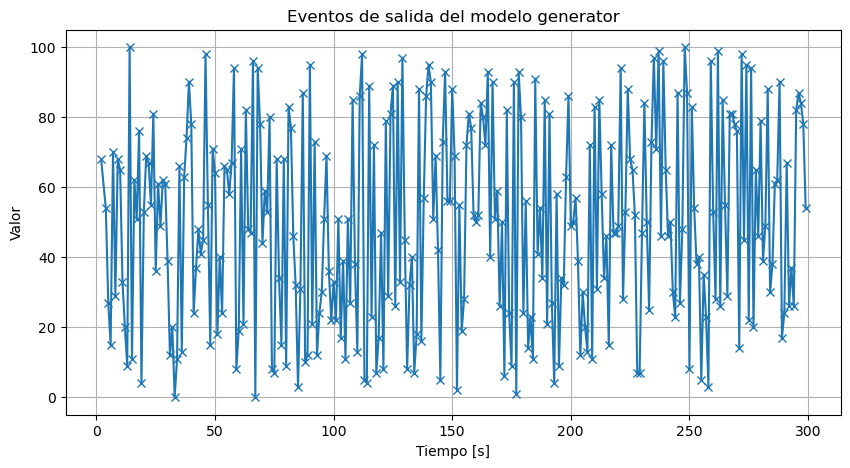

In [69]:
y_values,_,_ = salida[VALUE_COL].str
x_values = salida[TIME_COL]

plt.figure(figsize=(10,5))
plt.plot(x_values, y_values,marker='x')
plt.grid(True)
plt.xlabel('Tiempo [s]')
plt.ylabel('Valor')
plt.title('Eventos de salida del modelo generator');

Podemos observar que el último evento se produjo aproximadamente a los $300~\text{s}$, es decir, 00:05:00:000. Esto coincide con el evento en el puerto de entrada _stop_ que vimos en el archivo `pulse.ev`.

Para verificar que la primera componente de los eventos de salida sigue una distribución uniforme vamos a construir un histograma:

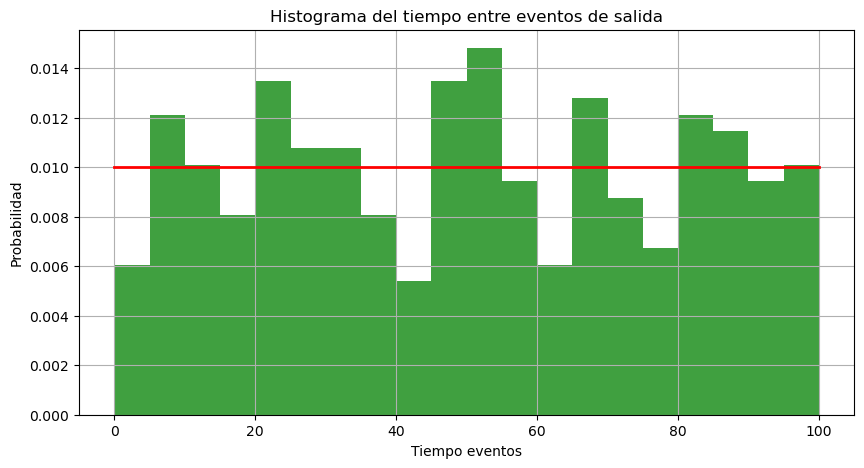

In [70]:
import scipy.stats as sps

plt.figure(figsize=(10,5))

# histograma de los eventos de salida
n, bins, patches = plt.hist(y_values, 20, density=True, facecolor='g', alpha=0.75)

# funcion de densidad de probabilidad teorica
u = sps.uniform.pdf(bins, loc=0, scale=100)
plt.plot(bins,u,'r',linewidth=2)

plt.xlabel('Tiempo eventos')
plt.ylabel('Probabilidad')
plt.title('Histograma del tiempo entre eventos de salida')
plt.grid(True)

# Consideraciones importantes de CD++

## Simulación de un modelo atómico _ad-hoc_

Si queremos crear un ejemplo propio para CD++ sugerimos tomar como base el ejemplo `pulse` que acabamos de analizar y que encontramos dentro de `CDPP_EXAMPLES` en `pulse/src`. 

En particular, es importante incluir un Makefile que defina al menos:

 * La variable `KERNEL_SRC` apuntando al directorio en donde se ubica el código fuente de cd++.
 * La variable `MODEL_FLAGS` con valor `-DREGISTER_ATOMICS`. Esta es para compilar el código responsable de registrar el modelo atómico deseado en el _kernel_ del simulador.
 * La inclusión de definiciones y reglas de compilación provistas para el simulador:
 
```
    include $(KERNEL_SRC)/Makefile.rules
    include $(KERNEL_SRC)/Makefile.defs
```

También es importante incluir una implementación de la función:

```C++
void register_atomics_on(ParallelModelAdmin &admin)
```

cuyo propósito es registrar en el _kernel_ los modelos atómicos que se quieren usar. En general, es suficiente con incluir una línea como la que sigue:

```C++
admin.registerAtomic(NewAtomicFunction<ModelClass>(), "Model name");
```

Si miramos el contenido del archivo `reg.cpp`, veremos cómo se regitra el modelo en el kernel del simulador:

In [71]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/pulse/src/

cat reg.cpp

#include "pmodeladm.h"
#include "register.h"

#include "pulse.h"


void register_atomics_on(ParallelModelAdmin &admin)
{
	admin.registerAtomic(NewAtomicFunction<Pulse>(), ATOMIC_MODEL_NAME);
}


Aquí `Pulse` es el nombre de la clase que implementa nuestro modelo y la macro `ATOMIC_MODEL_NAME` define su nombre (el cual tiene que ser único).